In [1]:
# Run if using google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Setup path

import os
import sys

# From jupyter notebook, starting from Tensor-Completion/
'''
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
'''

# From google colab
# Add parent packages to path
repository_path = "/content/drive/My Drive/Tensor-Completion"
sys.path.append(repository_path)
sys.path.append(repository_path +"/Code")

# Add lib directory, containing the required libraries, to path
libs_path = "/content/drive/My Drive/lib"
sys.path.append(libs_path)

In [0]:
try:
  import cupy as cp
except:
  print("cupy not available")

import cv2
import matplotlib.pyplot as plt
import numpy as np
import time

from Models.TT_WOPT import TT_WOPT_Model
from metrics import RSE
from Utils import mask_img

img shape:  (256, 256, 3)


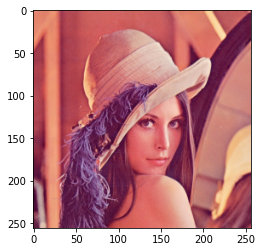

In [5]:
# Read lena image
img_path = '/content/drive/My Drive/Tensor-Completion/Code/data/lena_red.bmp'

img = cv2.imread(img_path, 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (256, 256))
plt.imshow(img)
print("img shape: ", img.shape)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


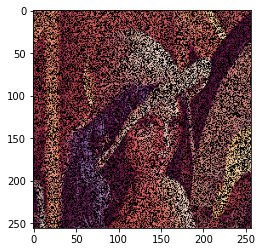

In [6]:
# Mask image
img = cp.asarray(img) # If using cupy

missing_rate=0.5
img_missing = mask_img(img, missing_rate=missing_rate)

#plt.imshow(img_missing) # If using numpy
plt.imshow(cp.asnumpy(img_missing).astype(int)) # If using cupy

In [0]:
# Create and train using gradient descent

model = TT_WOPT_Model(img_missing, (1, 14, 14, 1), 1e-2)
model.train(10000)

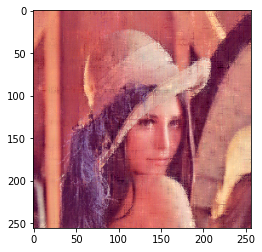

In [9]:
# Reconstruct the image using the trained model
prediction = model.predict()
prediction = np.clip(prediction, 0, 255)
plt.imshow(cp.asnumpy(prediction).astype(int))

In [10]:
# Compute the RSE of our prediction
error = RSE(img/255, prediction/255)
print("RSE:", error)

RSE: 0.0982156822291108


In [11]:
# Create and train the model using ncg
model = TT_WOPT_Model(img_missing, (1, 24, 24, 1), lr=None, optimization="ncg")
model.train(10000, gtol=1e-6)

         Current function value: 47.156029
         Iterations: 8212
         Function evaluations: 15956
         Gradient evaluations: 15944


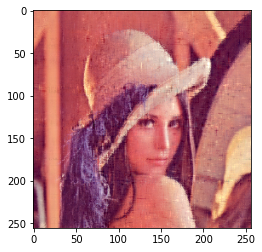

In [12]:
# Reconstruct the image using the trained model
prediction = model.predict()
prediction = np.clip(prediction, 0, 255)
plt.imshow(cp.asnumpy(prediction).astype(int))

In [13]:
# Compute the RSE of our prediction

error = RSE(img/255, prediction/255)
print("RSE:", error)

RSE: 0.08451547097668995
